# Projeto Análise de Dados: Supermercados Dashboard

## Introdução

https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

**Atributos:**

## Pré Processamento

Bibliotecas:

In [3]:
import math
from typing import Iterator
from datetime import datetime, timedelta

import numpy as np
import pandas as pd

In [118]:
mercado = pd.read_csv("supermarket_sales - Sheet1.csv")
mercado.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Vamos verificar se os dados possuem valores nulo.

In [95]:
valores_nulos = mercado.isnull().values.any()

if valores_nulos:
    print("Há valores nulos na tabela!")
else:
    print("Não há valores nulos na tabela.")

Não há valores nulos na tabela.


In [6]:
valores_nulos = mercado.isnull().sum()
print(valores_nulos)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


Conhecendo os dados que vamos trabalhar:

In [96]:
print(mercado.info(), mercado.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Atributos categóricos:

In [8]:
mercado.select_dtypes("object").describe().transpose()

,count,unique,top,freq
Invoice ID,1000,1000,750-67-8428,1
Branch,1000,3,A,340
City,1000,3,Yangon,340
Customer type,1000,2,Member,501
Gender,1000,2,Female,501
Product line,1000,6,Fashion accessories,178
Date,1000,89,2/7/2019,20
Time,1000,506,19:48,7
Payment,1000,3,Ewallet,345


Atributos numéricos:

In [9]:
mercado.select_dtypes("int64").describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,1000.0,5.51,2.923431,1.0,3.0,5.0,8.0,10.0


In [10]:
mercado.select_dtypes("float64").describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


A descrição dos dados acima nos ajudar a entender como estão formados os dados, nos dando uma visão  geral do todo.

## Extração

In [97]:
mercado.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [98]:
mercado.Date.min()

'1/1/2019'

In [99]:
mercado.Date.max()

'3/9/2019'

In [119]:
def date_range(start_date: datetime, end_date: datetime) -> Iterator[datetime]:
    date_range_days: int = (end_date - start_date).days
    for lag in range(date_range_days):
        yield start_date + timedelta(lag)

Para proseguir com esse projeto, precisamos converter a data que está no formato de string para a função datetime.

In [120]:
start_date = datetime.strptime('1/1/2019','%m/%d/%Y')
end_date = datetime.strptime('3/9/2019','%m/%d/%Y')

Vamos selecionar as linhas de interesse referentes a apenas o supermercado A

In [121]:
mercados = None
mercados_is_empty = True

for date in date_range(start_date=start_date, end_date=end_date):

    date_str = date.strftime('%m/%d/%Y')
    mercado = pd.read_csv("supermarket_sales - Sheet1.csv")

    mercado = mercado.drop(['Time'],axis=1)
    mercado['Date'] = pd.to_datetime(date.strftime('%Y-%m-%d'))
    

    if mercados_is_empty:
        mercados = mercado
        mercados_is_empty = False
    else:
        mercados = mercados.append(mercado, ignore_index=True)

mercado = mercados.sort_values(by='Date', ascending=False)

C:\Users\micae\AppData\Local\Temp\ipykernel_12880\1427582747.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mercados = mercados.append(mercado, ignore_index=True)
C:\Users\micae\AppData\Local\Temp\ipykernel_12880\1427582747.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mercados = mercados.append(mercado, ignore_index=True)
C:\Users\micae\AppData\Local\Temp\ipykernel_12880\1427582747.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mercados = mercados.append(mercado, ignore_index=True)
C:\Users\micae\AppData\Local\Temp\ipykernel_12880\1427582747.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mercados = mercados.app

In [103]:
mercado.query('Branch == "A"').head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
66999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-03-08,Cash,618.38,4.761905,30.9190,6.6
66336,898-04-2717,A,Yangon,Normal,Male,Fashion accessories,76.40,9,34.3800,721.9800,2019-03-08,Ewallet,687.60,4.761905,34.3800,7.5
66335,527-09-6272,A,Yangon,Member,Female,Electronic accessories,28.45,5,7.1125,149.3625,2019-03-08,Credit card,142.25,4.761905,7.1125,9.1
66333,442-48-3607,A,Yangon,Member,Male,Food and beverages,23.48,2,2.3480,49.3080,2019-03-08,Credit card,46.96,4.761905,2.3480,7.9
66332,566-71-1091,A,Yangon,Normal,Male,Fashion accessories,77.02,5,19.2550,404.3550,2019-03-08,Cash,385.10,4.761905,19.2550,5.5


In [18]:
mercado.query('Branch == "B"').head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
66328,730-61-8757,B,Mandalay,Member,Male,Health and beauty,51.13,4,10.2260,214.7460,2019-03-08,Credit card,204.52,4.761905,10.2260,4.0
66341,433-75-6987,B,Mandalay,Member,Female,Health and beauty,55.97,7,19.5895,411.3795,2019-03-08,Ewallet,391.79,4.761905,19.5895,8.9
66340,378-07-7001,B,Mandalay,Member,Male,Electronic accessories,48.09,3,7.2135,151.4835,2019-03-08,Credit card,144.27,4.761905,7.2135,7.8
66339,374-17-3652,B,Mandalay,Member,Female,Food and beverages,42.82,9,19.2690,404.6490,2019-03-08,Credit card,385.38,4.761905,19.2690,8.9
66337,692-27-8933,B,Mandalay,Normal,Female,Sports and travel,57.95,6,17.3850,365.0850,2019-03-08,Cash,347.70,4.761905,17.3850,5.2


In [19]:
mercado.query('Branch == "C"').head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
66338,633-09-3463,C,Naypyitaw,Normal,Female,Electronic accessories,47.65,3,7.1475,150.0975,2019-03-08,Credit card,142.95,4.761905,7.1475,9.5
66334,835-16-0096,C,Naypyitaw,Member,Male,Sports and travel,14.70,5,3.6750,77.1750,2019-03-08,Ewallet,73.50,4.761905,3.6750,8.5
66327,719-76-3868,C,Naypyitaw,Member,Male,Food and beverages,94.26,4,18.8520,395.8920,2019-03-08,Cash,377.04,4.761905,18.8520,8.6
66321,622-20-1945,C,Naypyitaw,Normal,Female,Health and beauty,39.42,1,1.9710,41.3910,2019-03-08,Cash,39.42,4.761905,1.9710,8.4
66320,649-11-3678,C,Naypyitaw,Normal,Female,Food and beverages,22.93,9,10.3185,216.6885,2019-03-08,Cash,206.37,4.761905,10.3185,5.5


### Wrangling

In [20]:
mercado.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
66999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-03-08,Cash,618.38,4.761905,30.9190,6.6
66328,730-61-8757,B,Mandalay,Member,Male,Health and beauty,51.13,4,10.2260,214.7460,2019-03-08,Credit card,204.52,4.761905,10.2260,4.0
66341,433-75-6987,B,Mandalay,Member,Female,Health and beauty,55.97,7,19.5895,411.3795,2019-03-08,Ewallet,391.79,4.761905,19.5895,8.9
66340,378-07-7001,B,Mandalay,Member,Male,Electronic accessories,48.09,3,7.2135,151.4835,2019-03-08,Credit card,144.27,4.761905,7.2135,7.8
66339,374-17-3652,B,Mandalay,Member,Female,Food and beverages,42.82,9,19.2690,404.6490,2019-03-08,Credit card,385.38,4.761905,19.2690,8.9


In [21]:
mercado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67000 entries, 66999 to 0
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               67000 non-null  object        
 1   Branch                   67000 non-null  object        
 2   City                     67000 non-null  object        
 3   Customer type            67000 non-null  object        
 4   Gender                   67000 non-null  object        
 5   Product line             67000 non-null  object        
 6   Unit price               67000 non-null  float64       
 7   Quantity                 67000 non-null  int64         
 8   Tax 5%                   67000 non-null  float64       
 9   Total                    67000 non-null  float64       
 10  Date                     67000 non-null  datetime64[ns]
 11  Payment                  67000 non-null  object        
 12  cogs                     67000 n

In [22]:
print(mercado.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')


Vamos mudar o nome das colunas.

In [122]:
mercado = mercado.rename(
    columns={
        'Invoice ID':'ID_Fatura',
        'Branch': 'Filial_mercado',
        'City': 'Cidade',
        'Customer type': 'Tipo_cliente',
        'Gender': 'Genero_cliente',
        'Product line': 'Linha_produtos',
        'Unit price': 'Preço_unitario_produto',
        'Quantity': 'Quantidade_produto',
        'Tax 5%': 'Imposto_5_porcento',
        'Total': 'Preco_total',
        'Date': 'Data',
        'Payment':'Forma_pagamento',
        'cogs':'Custo_mercadoria_vendida',
        'gross margin percentage': 'Margem_bruta',
        'gross income': 'Receita_bruta',
        'Rating': 'Avaliacao'
    }
)

for col in mercado.columns:
    mercado =mercado.rename(columns={col: col.lower()})

In [52]:
mercado.head()

,id_fatura,filial_mercado,cidade,tipo_cliente,genero_cliente,linha_produtos,preço_unitario_produto,quantidade_produto,imposto_5_porcento,preco_total,data,forma_pagamento,custo_mercadoria_vendida,margem_bruta,receita_bruta,avaliacao
66999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-03-08,Cash,618.38,4.761905,30.9190,6.6
66328,730-61-8757,B,Mandalay,Member,Male,Health and beauty,51.13,4,10.2260,214.7460,2019-03-08,Credit card,204.52,4.761905,10.2260,4.0
66341,433-75-6987,B,Mandalay,Member,Female,Health and beauty,55.97,7,19.5895,411.3795,2019-03-08,Ewallet,391.79,4.761905,19.5895,8.9
66340,378-07-7001,B,Mandalay,Member,Male,Electronic accessories,48.09,3,7.2135,151.4835,2019-03-08,Credit card,144.27,4.761905,7.2135,7.8
66339,374-17-3652,B,Mandalay,Member,Female,Food and beverages,42.82,9,19.2690,404.6490,2019-03-08,Credit card,385.38,4.761905,19.2690,8.9


Ajustamos o nome do tipo dos clientes

In [26]:
mercado.tipo_cliente.shape

(67000,)

In [123]:
tipo_cliente_map = {
    'Member': 'integrante',
    'Normal': 'Normal'
}
mercado['tipo_cliente'] = mercado['tipo_cliente'].apply(lambda tipo_cliente: tipo_cliente_map.get(tipo_cliente) if tipo_cliente in tipo_cliente_map.keys() else tipo_cliente)

In [124]:
mercado.head()

,id_fatura,filial_mercado,cidade,tipo_cliente,genero_cliente,linha_produtos,preço_unitario_produto,quantidade_produto,imposto_5_porcento,preco_total,data,forma_pagamento,custo_mercadoria_vendida,margem_bruta,receita_bruta,avaliacao
66999,849-09-3807,A,Yangon,integrante,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-03-08,Cash,618.38,4.761905,30.9190,6.6
66328,730-61-8757,B,Mandalay,integrante,Male,Health and beauty,51.13,4,10.2260,214.7460,2019-03-08,Credit card,204.52,4.761905,10.2260,4.0
66341,433-75-6987,B,Mandalay,integrante,Female,Health and beauty,55.97,7,19.5895,411.3795,2019-03-08,Ewallet,391.79,4.761905,19.5895,8.9
66340,378-07-7001,B,Mandalay,integrante,Male,Electronic accessories,48.09,3,7.2135,151.4835,2019-03-08,Credit card,144.27,4.761905,7.2135,7.8
66339,374-17-3652,B,Mandalay,integrante,Female,Food and beverages,42.82,9,19.2690,404.6490,2019-03-08,Credit card,385.38,4.761905,19.2690,8.9


Ajustamos o nome do gênero do cliente

In [29]:
counts = mercado["genero_cliente"].value_counts()
counts.head(10)

Female    33567
Male      33433
Name: genero_cliente, dtype: int64

In [125]:
genero_cliente_map = {
    'Female': 'Feminino',
    'Male': 'Masculino'
}
mercado['genero_cliente'] = mercado['genero_cliente'].apply(lambda genero_cliente: genero_cliente_map.get(genero_cliente) if genero_cliente in genero_cliente_map.keys() else genero_cliente)

In [55]:
mercado.head()

,id_fatura,filial_mercado,cidade,tipo_cliente,genero_cliente,linha_produtos,preço_unitario_produto,quantidade_produto,imposto_5_porcento,preco_total,data,forma_pagamento,custo_mercadoria_vendida,margem_bruta,receita_bruta,avaliacao
66999,849-09-3807,A,Yangon,integrante,Feminino,Fashion accessories,88.34,7,30.9190,649.2990,2019-03-08,Cash,618.38,4.761905,30.9190,6.6
66328,730-61-8757,B,Mandalay,integrante,Masculino,Health and beauty,51.13,4,10.2260,214.7460,2019-03-08,Credit card,204.52,4.761905,10.2260,4.0
66341,433-75-6987,B,Mandalay,integrante,Feminino,Health and beauty,55.97,7,19.5895,411.3795,2019-03-08,Ewallet,391.79,4.761905,19.5895,8.9
66340,378-07-7001,B,Mandalay,integrante,Masculino,Electronic accessories,48.09,3,7.2135,151.4835,2019-03-08,Credit card,144.27,4.761905,7.2135,7.8
66339,374-17-3652,B,Mandalay,integrante,Feminino,Food and beverages,42.82,9,19.2690,404.6490,2019-03-08,Credit card,385.38,4.761905,19.2690,8.9


Ajustamos o nome da linha de produtos

In [32]:
counts = mercado["linha_produtos"].value_counts()
counts.head(10)

Fashion accessories       11926
Food and beverages        11658
Electronic accessories    11390
Sports and travel         11122
Home and lifestyle        10720
Health and beauty         10184
Name: linha_produtos, dtype: int64

In [126]:
linha_produtos_map = {
    'Fashion accessories': 'Acessorios de Moda',       
    'Food and beverages':'Alimentos e bebidas',        
    'Electronic accessories': 'Acessorios eletronicos',   
    'Sports and travel': 'Esportes e Viagens',         
    'Home and lifestyle': 'Casa e Estilo de Vida',
    'Health and beauty': 'Saude e beleza'
}
mercado['linha_produtos'] = mercado['linha_produtos'].apply(lambda linha_produtos: linha_produtos_map.get(linha_produtos) if linha_produtos in linha_produtos_map.keys() else linha_produtos)

In [34]:
mercado.head()

,id_fatura,filial_mercado,cidade,tipo_cliente,genero_cliente,linha_produtos,preço_unitario_produto,quantidade_produto,imposto_5_porcento,preco_total,data,forma_pagamento,custo_mercadoria_vendida,margem_bruta,receita_bruta,avaliacao
66999,849-09-3807,A,Yangon,integrante,Feminino,Acessorios de Moda,88.34,7,30.9190,649.2990,2019-03-08,Cash,618.38,4.761905,30.9190,6.6
66328,730-61-8757,B,Mandalay,integrante,Masculino,Saude e beleza,51.13,4,10.2260,214.7460,2019-03-08,Credit card,204.52,4.761905,10.2260,4.0
66341,433-75-6987,B,Mandalay,integrante,Feminino,Saude e beleza,55.97,7,19.5895,411.3795,2019-03-08,Ewallet,391.79,4.761905,19.5895,8.9
66340,378-07-7001,B,Mandalay,integrante,Masculino,Acessorios eletronicos,48.09,3,7.2135,151.4835,2019-03-08,Credit card,144.27,4.761905,7.2135,7.8
66339,374-17-3652,B,Mandalay,integrante,Feminino,Alimentos e bebidas,42.82,9,19.2690,404.6490,2019-03-08,Credit card,385.38,4.761905,19.2690,8.9


Ajustamos o nome de formas de pagamento

In [35]:
counts = mercado["forma_pagamento"].value_counts()
counts.head(10)

Ewallet        23115
Cash           23048
Credit card    20837
Name: forma_pagamento, dtype: int64

In [127]:
forma_pagamento_map = {        
    'Cash': 'dinheiro',           
    'Credit card': 'cartao de credito'    
}
mercado['forma_pagamento'] = mercado['forma_pagamento'].apply(lambda forma_pagamento: forma_pagamento_map.get(forma_pagamento) if forma_pagamento in forma_pagamento_map.keys() else forma_pagamento)

In [128]:
mercado.head()

,id_fatura,filial_mercado,cidade,tipo_cliente,genero_cliente,linha_produtos,preço_unitario_produto,quantidade_produto,imposto_5_porcento,preco_total,data,forma_pagamento,custo_mercadoria_vendida,margem_bruta,receita_bruta,avaliacao
66999,849-09-3807,A,Yangon,integrante,Feminino,Acessorios de Moda,88.34,7,30.9190,649.2990,2019-03-08,dinheiro,618.38,4.761905,30.9190,6.6
66328,730-61-8757,B,Mandalay,integrante,Masculino,Saude e beleza,51.13,4,10.2260,214.7460,2019-03-08,cartao de credito,204.52,4.761905,10.2260,4.0
66341,433-75-6987,B,Mandalay,integrante,Feminino,Saude e beleza,55.97,7,19.5895,411.3795,2019-03-08,Ewallet,391.79,4.761905,19.5895,8.9
66340,378-07-7001,B,Mandalay,integrante,Masculino,Acessorios eletronicos,48.09,3,7.2135,151.4835,2019-03-08,cartao de credito,144.27,4.761905,7.2135,7.8
66339,374-17-3652,B,Mandalay,integrante,Feminino,Alimentos e bebidas,42.82,9,19.2690,404.6490,2019-03-08,cartao de credito,385.38,4.761905,19.2690,8.9


Vamos computat novas colunas

In [129]:
mercado['Mes'] = mercado['data'].apply(lambda data: data.strftime('%m'))
mercado['Ano'] = mercado['data'].apply(lambda data: data.strftime('%Y'))
mercado['Dia'] = mercado['data'].apply(lambda data: data.strftime('%d'))

In [130]:
mercado.head()

,id_fatura,filial_mercado,cidade,tipo_cliente,genero_cliente,linha_produtos,preço_unitario_produto,quantidade_produto,imposto_5_porcento,preco_total,data,forma_pagamento,custo_mercadoria_vendida,margem_bruta,receita_bruta,avaliacao,Mes,Ano,Dia
66999,849-09-3807,A,Yangon,integrante,Feminino,Acessorios de Moda,88.34,7,30.9190,649.2990,2019-03-08,dinheiro,618.38,4.761905,30.9190,6.6,03,2019,08
66328,730-61-8757,B,Mandalay,integrante,Masculino,Saude e beleza,51.13,4,10.2260,214.7460,2019-03-08,cartao de credito,204.52,4.761905,10.2260,4.0,03,2019,08
66341,433-75-6987,B,Mandalay,integrante,Feminino,Saude e beleza,55.97,7,19.5895,411.3795,2019-03-08,Ewallet,391.79,4.761905,19.5895,8.9,03,2019,08
66340,378-07-7001,B,Mandalay,integrante,Masculino,Acessorios eletronicos,48.09,3,7.2135,151.4835,2019-03-08,cartao de credito,144.27,4.761905,7.2135,7.8,03,2019,08
66339,374-17-3652,B,Mandalay,integrante,Feminino,Alimentos e bebidas,42.82,9,19.2690,404.6490,2019-03-08,cartao de credito,385.38,4.761905,19.2690,8.9,03,2019,08


Número, média móvel(7 dias) e estabilidade(14 dias) de total por cidade

**Cálculo Média de Avaliação do Cliente**

In [91]:
import matplotlib.pyplot as plt

tipo_cliente
Normal        7.005210
integrante    6.940319
Name: avaliacao, dtype: float64


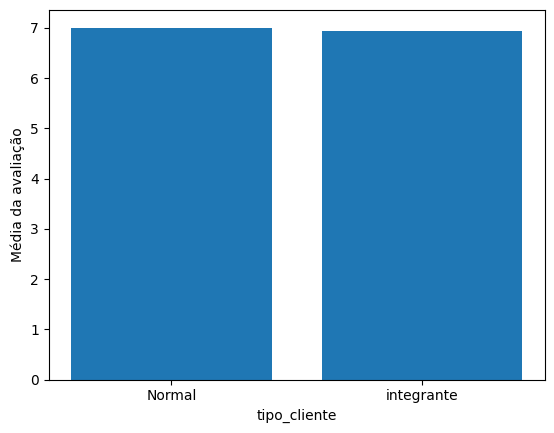

In [131]:
def media_avaliacao_por_cliente(mercado):
    media_avaliacao_por_cliente = mercado.groupby('tipo_cliente')['avaliacao'].mean()
    return media_avaliacao_por_cliente

media_avaliacao_por_cliente = media_avaliacao_por_cliente(mercado)

print(media_avaliacao_por_cliente)

plt.bar(media_avaliacao_por_cliente.index, media_avaliacao_por_cliente.values)
plt.xlabel('tipo_cliente')
plt.ylabel('Média da avaliação')
plt.show()


**Cálculo da Receita Bruta por Mês**

Mes
01    476760.439
02    430622.332
03    123034.952
Name: receita_bruta, dtype: float64


Text(0, 0.5, 'Receita Bruta')

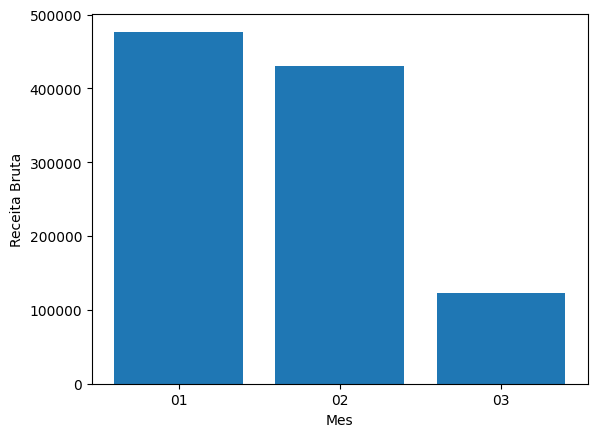

In [132]:
def receita_bruta_por_mes(mercado):
    receita_bruta_por_mes = mercado.groupby('Mes')['receita_bruta'].sum()
    return receita_bruta_por_mes

receita_bruta_por_mes = receita_bruta_por_mes(mercado)

print(receita_bruta_por_mes)

plt.bar(receita_bruta_por_mes.index, receita_bruta_por_mes.values)
plt.xlabel('Mes')
plt.ylabel('Receita Bruta')

**Cálculo de Margem Bruta**

Mes
01    147619.047622
02    133333.333336
03     38095.238096
Name: margem_bruta, dtype: float64


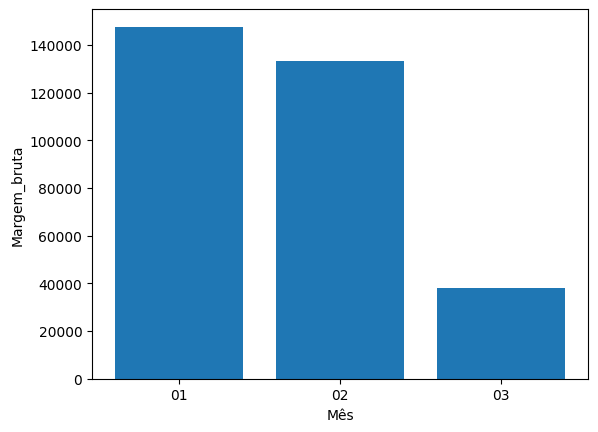

In [133]:
def margem_bruta_por_mes(mercado):
    margem_bruta_por_mes = mercado.groupby('Mes')['margem_bruta'].sum()
    return margem_bruta_por_mes

margem_bruta_por_mes = margem_bruta_por_mes(mercado)

print(margem_bruta_por_mes)

plt.bar(margem_bruta_por_mes.index, margem_bruta_por_mes.values)
plt.xlabel('Mês')
plt.ylabel('Margem_bruta')
plt.show()

**Total de Vendas por filial**

filial_mercado
A    7.115425e+06
B    7.115244e+06
C    7.408103e+06
Name: preco_total, dtype: float64


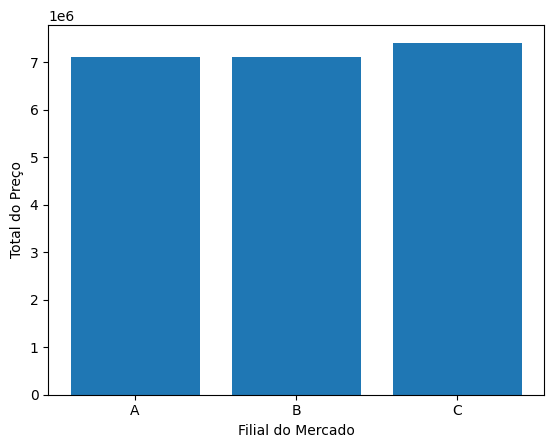

In [137]:
def total_vendas_por_filial(mercado):
    total_vendas_por_filial = mercado.groupby('filial_mercado')['preco_total'].sum()
    return total_vendas_por_filial

total_vendas_por_filial = total_vendas_por_filial(mercado)

print(total_vendas_por_filial)

plt.bar(total_vendas_por_filial.index, total_vendas_por_filial.values)
plt.xlabel('Filial do Mercado')
plt.ylabel('Total do Preço')
plt.show()

**Média Preço Unitário por categoria de Produto**

In [140]:
mercado.head()

,id_fatura,filial_mercado,cidade,tipo_cliente,genero_cliente,linha_produtos,preço_unitario_produto,quantidade_produto,imposto_5_porcento,preco_total,data,forma_pagamento,custo_mercadoria_vendida,margem_bruta,receita_bruta,avaliacao,Mes,Ano,Dia
66999,849-09-3807,A,Yangon,integrante,Feminino,Acessorios de Moda,88.34,7,30.9190,649.2990,2019-03-08,dinheiro,618.38,4.761905,30.9190,6.6,03,2019,08
66328,730-61-8757,B,Mandalay,integrante,Masculino,Saude e beleza,51.13,4,10.2260,214.7460,2019-03-08,cartao de credito,204.52,4.761905,10.2260,4.0,03,2019,08
66341,433-75-6987,B,Mandalay,integrante,Feminino,Saude e beleza,55.97,7,19.5895,411.3795,2019-03-08,Ewallet,391.79,4.761905,19.5895,8.9,03,2019,08
66340,378-07-7001,B,Mandalay,integrante,Masculino,Acessorios eletronicos,48.09,3,7.2135,151.4835,2019-03-08,cartao de credito,144.27,4.761905,7.2135,7.8,03,2019,08
66339,374-17-3652,B,Mandalay,integrante,Feminino,Alimentos e bebidas,42.82,9,19.2690,404.6490,2019-03-08,cartao de credito,385.38,4.761905,19.2690,8.9,03,2019,08


linha_produtos
Acessorios de Moda        57.153652
Acessorios eletronicos    53.551588
Alimentos e bebidas       56.008851
Casa e Estilo de Vida     55.316937
Esportes e Viagens        56.993253
Saude e beleza            54.854474
Name: preço_unitario_produto, dtype: float64


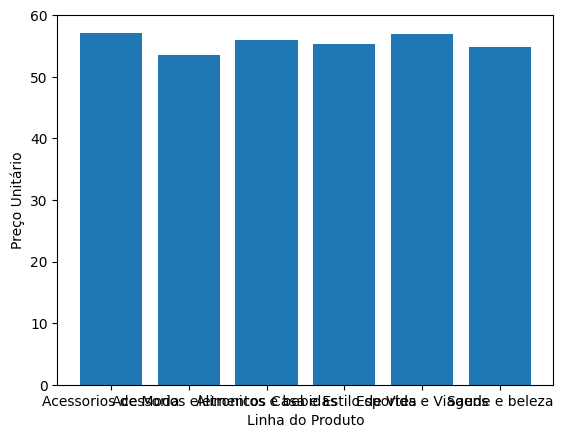

In [143]:
def media_preco_unico_por_categoria_produto(mercado):
    media_preco_unico_por_categoria_produto = mercado.groupby('linha_produtos')['preço_unitario_produto'].mean()
    return media_preco_unico_por_categoria_produto

media_preco_unico_por_categoria_produto = media_preco_unico_por_categoria_produto(mercado)

print(media_preco_unico_por_categoria_produto)

plt.bar(media_preco_unico_por_categoria_produto.index, media_preco_unico_por_categoria_produto.values)
plt.xlabel('Linha do Produto')
plt.ylabel('Preço Unitário')
plt.show()